In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

 99% 216M/218M [00:02<00:00, 91.8MB/s]
100% 218M/218M [00:02<00:00, 108MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install tensorFlow
!pip install sequential
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

  Preparing metadata (setup.py) ... done
  Created wheel for sequential: filename=sequential-1.0.0-py3-none-any.whl size=2859 sha256=69edd2f4166876b87935fc7c2b886d9f4820c82ac6684cf8decb11e94b3e0fce
  Stored in directory: /root/.cache/pip/wheels/c3/61/56/fe456787532527aafb108ffeceecb4a2e928a518c88bbdd5c5
Successfully built sequential


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/training_set/training_set',
  labels='inferred',
  label_mode = 'int',
  batch_size=32,
  image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/test_set/test_set',
  labels='inferred',
  label_mode = 'int',
  batch_size=32,
  image_size=(256,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image = tf.cast (image/255.,tf.float32)
  return image, label

train_ds =  train_ds.map(process)
validation_ds = validation_ds = validation_ds.map(process)

In [ ]:
Dropout
from keras.src.backend import dropout
from keras.src.layers.normalization.batch_normalization import BatchNormalization
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding= 'valid', activation= 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D (pool_size=(2,2), strides=2, padding= 'valid'))

model.add(Conv2D (128 , kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D (pool_size=(2,2), strides=2, padding= 'valid'))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=15, validation_data=validation_ds)

Epoch 1/15
251/251 [==============================] - 1622s 6s/step - loss: 2.2659 - accuracy: 0.5518 - val_loss: 0.9774 - val_accuracy: 0.5220
Epoch 2/15
251/251 [==============================] - 1576s 6s/step - loss: 0.7450 - accuracy: 0.5749 - val_loss: 0.8423 - val_accuracy: 0.5818
Epoch 3/15
 64/251 [======>.......................] - ETA: 18:07 - loss: 0.7656 - accuracy: 0.6069

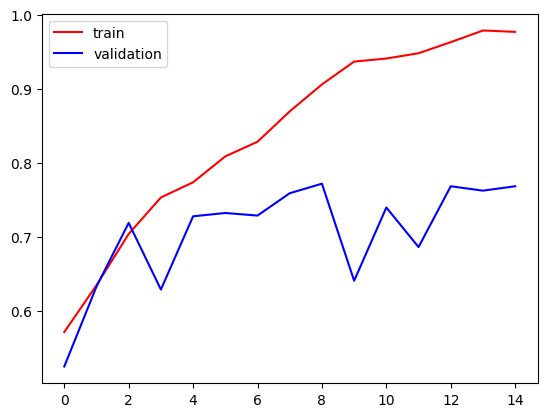

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

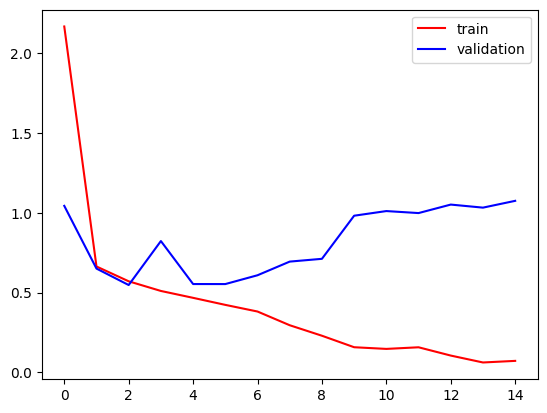

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

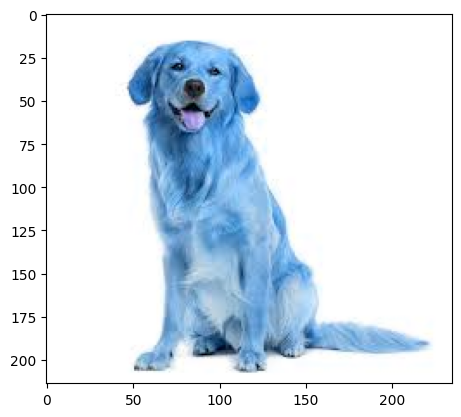

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(214, 235, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 459ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

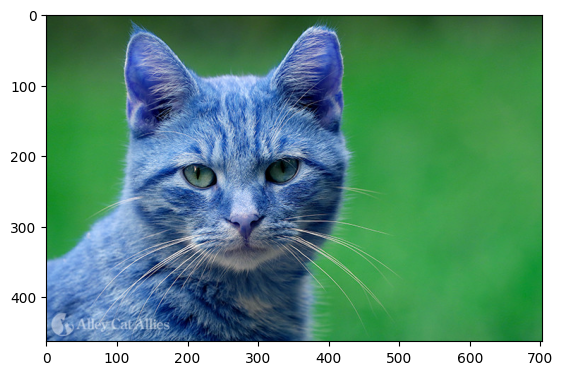

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(463, 703, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)